# Utilisation des mots ne figurant pas dans le dictionnaire français

## Imports
On aura besoin des librairie externe: 
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [wordcloud](https://amueller.github.io/word_cloud/)

In [227]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from typing import List
from IPython.display import clear_output

## Ouverture des fichiers contenant les données a utiliser

In [228]:
songs: pd.DataFrame
french: pd.Series

with open("../../src/datas/songs.json", "r", encoding="utf8") as file:
        songs = pd.DataFrame(json.loads(file.read()))

with open("../../src/datas/french.txt", "r", encoding="utf8") as file:
        french = pd.Series(file.read().lower().splitlines())

## Séléction et manipulation des données afin de pouvoir les utiliser

In [229]:
# Group all the words of all the songs in a single pd.Serie
words: pd.Series = songs["lyrics_dictionary"].apply(lambda x: x.split(" ")).explode()

# Count all the words in this array
occurences: pd.Series = words.value_counts()

# Create a Dataframe that contains the number of occurence
# and if the word is inside the french dictionary
description = pd.DataFrame(
    data={"count": occurences, "is_french": occurences.index.isin(french)},
    columns=["count", "is_french"],
    index=occurences.index
)

# Select only the words that aren't french
not_french = description[description["is_french"] == False]

with open("../../src/datas/not_french.csv", "w", encoding="utf8") as f:
        f.write(not_french.to_csv())
        f.close()

not_french

,count,is_french
yeah,1303,False
hey,911,False
fuck,419,False
yah,267,False
binks,266,False
...,...,...
cherche-le,1,False
win-win,1,False
página,1,False
zap,1,False


Ceci est la liste des mots de figurant pas dans le dictionnaire france avec leurs occurences (globale, parmis toutes les musiques)

## WordCloud, plus le mot est grand, plus il est utilisé

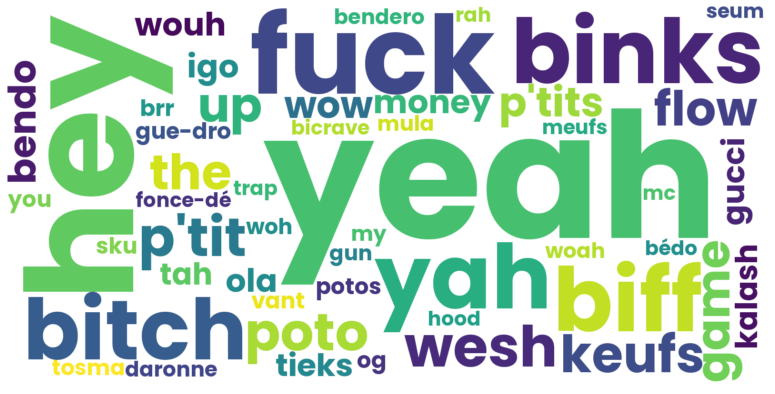

In [230]:
frequency = pd.Series(not_french["count"], index=not_french.index)

wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Histogramme des mots

<AxesSubplot:>

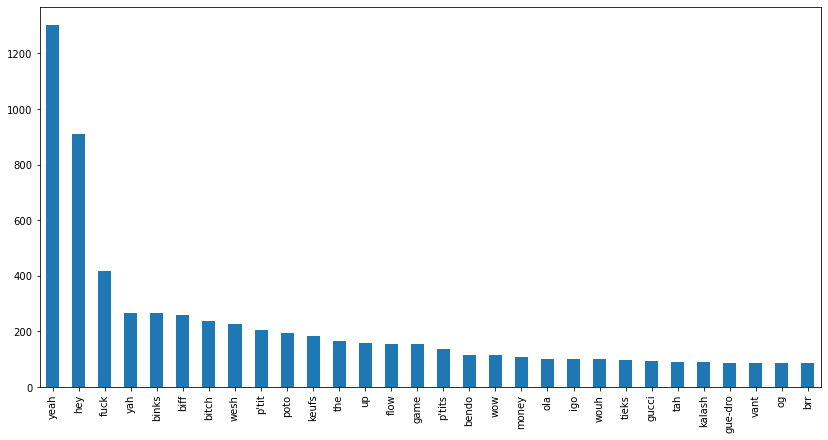

In [231]:
frequency[:30].plot(kind="bar", figsize=(14, 7))